In [15]:
from download_openaq import download
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [116]:
data = download('US Diplomatic Post: Kampala',verbose=True,startdate='2019-03-01')

Trying cache
Loaded 2262 records from cache.
Loading API page 1
Loading API page 2
Loading API page 3
Loading API page 4
End of pagination on page 4
Combining 2262 cached records with 2168 API records
Total data set contains 2263 records


/home/mike/Documents/Research/download_openaq/download_openaq/__init__.py:96: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  data = pd.concat([data,olddata]).drop_duplicates()


In [117]:
data

,attribution,city,coordinates.latitude,coordinates.longitude,country,date.utc,location,parameter,unit,value
date.local,,,,,,,,,,
2019-03-01 00:00:00,"[{""name"":""EPA AirNow DOS"",""url"":""http://airnow...",Kampala,0.300225,32.591553,UG,2019-03-01 00:00:00,US Diplomatic Post: Kampala,pm25,µg/m³,61.0
2019-03-01 01:00:00,"[{""name"":""EPA AirNow DOS"",""url"":""http://airnow...",Kampala,0.300225,32.591553,UG,2019-03-01 01:00:00,US Diplomatic Post: Kampala,pm25,µg/m³,73.0
2019-03-01 02:00:00,"[{""name"":""EPA AirNow DOS"",""url"":""http://airnow...",Kampala,0.300225,32.591553,UG,2019-03-01 02:00:00,US Diplomatic Post: Kampala,pm25,µg/m³,70.0
2019-03-01 03:00:00,"[{""name"":""EPA AirNow DOS"",""url"":""http://airnow...",Kampala,0.300225,32.591553,UG,2019-03-01 03:00:00,US Diplomatic Post: Kampala,pm25,µg/m³,78.0
2019-03-01 04:00:00,"[{""name"":""EPA AirNow DOS"",""url"":""http://airnow...",Kampala,0.300225,32.591553,UG,2019-03-01 04:00:00,US Diplomatic Post: Kampala,pm25,µg/m³,97.0
2019-03-01 05:00:00,"[{""name"":""EPA AirNow DOS"",""url"":""http://airnow...",Kampala,0.300225,32.591553,UG,2019-03-01 05:00:00,US Diplomatic Post: Kampala,pm25,µg/m³,150.0
2019-03-01 06:00:00,"[{""name"":""EPA AirNow DOS"",""url"":""http://airnow...",Kampala,0.300225,32.591553,UG,2019-03-01 06:00:00,US Diplomatic Post: Kampala,pm25,µg/m³,131.0
2019-03-01 07:00:00,"[{""name"":""EPA AirNow DOS"",""url"":""http://airnow...",Kampala,0.300225,32.591553,UG,2019-03-01 07:00:00,US Diplomatic Post: Kampala,pm25,µg/m³,90.0
2019-03-01 08:00:00,"[{""name"":""EPA AirNow DOS"",""url"":""http://airnow...",Kampala,0.300225,32.591553,UG,2019-03-01 08:00:00,US Diplomatic Post: Kampala,pm25,µg/m³,57.0


In [98]:
hour = np.arange(0,100,1.0) % 24
traffic = 0.1*(np.arange(0,len(hour),1.0))+np.random.randn(len(hour))

In [108]:
X = np.c_[np.cos(2*np.pi*hour/24),np.sin(2*np.pi*hour/24),np.cos(2*np.pi*hour/12),np.sin(2*np.pi*hour/12),traffic]
X = X/np.std(X,0)
X = X - np.mean(X,0)
X = np.c_[X,np.ones(len(X))]

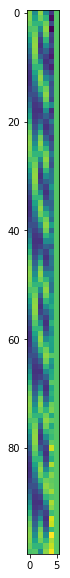

In [109]:
plt.figure(figsize=[10,10])
plt.imshow(X)

In [110]:
y = np.zeros(len(X))
y[hour<6]=4
y=y+traffic*0.5+np.random.rand(len(y))

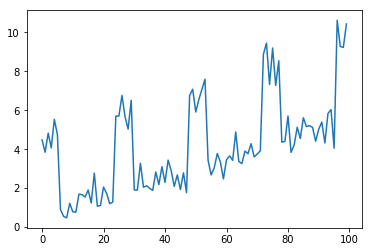

In [111]:
plt.plot(y)

In [112]:
w = np.linalg.inv(X.T @ X) @ X.T @ y

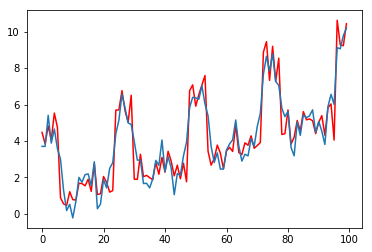

In [113]:
plt.plot(y,'r-')
plt.plot(X@w)

In [114]:
w

array([1.03503227, 0.70666699, 0.2728105 , 0.92310047, 1.54657963,
       4.1339527 ])

In [115]:
np.mean(np.abs(X@w-y)) #mean abs error

0.6056003555158597